In [ ]:
%matplotlib inline
import numpy as np
from pprint import pprint
from random import random
from matplotlib import pyplot as plt

In [753]:
def actv_fn(x, fn='sigmoid', derivative=False):
    alpha = 0.0009 # leaky relu parameter
    if not derivative:
        
        if fn == 'sigmoid': 
            return 1/(1+np.exp(-x))
        elif fn == 'relu':
            x[x<0] = 0 
            return x
        elif fn == 'leakyrelu' :
            x = np.where(x > 0, x, x * alpha)
            return x
        elif fn == 'tanh':
            return np.tanh(x)
        else:
            return None
    else:
        
        if fn == 'sigmoid':
            # input x is value of sigmoid(x)
            return x*(1-x)
        elif fn == 'relu':
            # input x is value of relu(x) i.e x or 0.01x
            x[x<=0] = 0
            x[x>0] = 1
            return x
        elif fn == 'tanh':
            # input x is value of tanh(x)
            return 1.0 - x**2
        elif fn == 'leakyrelu':
            
            dx = np.ones_like(x)
            dx[x < 0] = alpha 
            return dx
        else:
            return None
    
def error(y, yhat):
    print('y and yhat are here:',y,yhat)
    return np.sum((np.subtract(yhat, y)**2)/2)

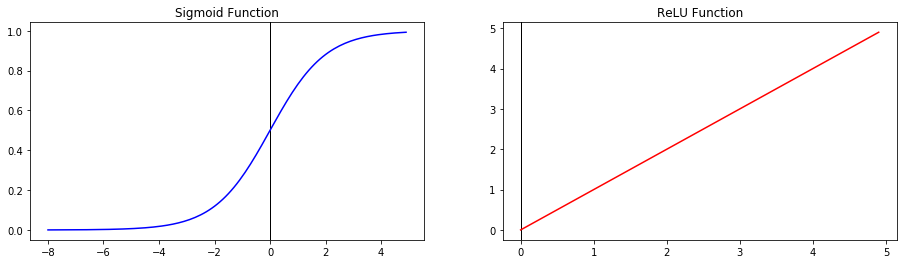

In [754]:
x = np.arange(-8, 5, 0.1)
fig = plt.figure(figsize=(24, 4))

y1 = actv_fn(x, fn='sigmoid') 
ax1 = fig.add_subplot(131)
ax1.set_title('Sigmoid Function')
ax1.axvline(0, linewidth=1, color='black')
ax1.plot(x, y1, 'b-')



y2 = actv_fn(x, fn='relu') 

ax2 = fig.add_subplot(132)
ax2.set_title('ReLU Function')
ax2.axvline(0, linewidth=1, color='black')
ax2.plot(x, y2, 'r-')




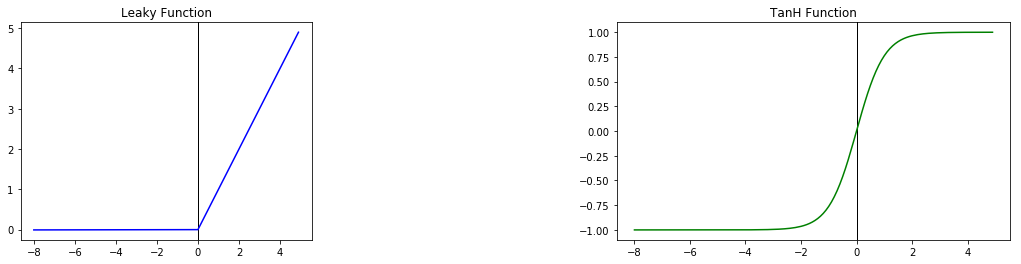

In [755]:

fig1= plt.figure(figsize=(24, 4))
x = np.arange(-8, 5, 0.1)
y4 = actv_fn(x, fn='leakyrelu') 
ax3 = fig1.add_subplot(142)
ax3.set_title('Leaky Function')
ax3.axvline(0, linewidth=1, color='black')
ax3.plot(x, y4, 'b-')






y3 = actv_fn(x, fn='tanh') 
ax3 = fig1.add_subplot(133)
ax3.set_title('TanH Function')
ax3.axvline(0, linewidth=1, color='black')
ax3.plot(x, y3, 'g-')





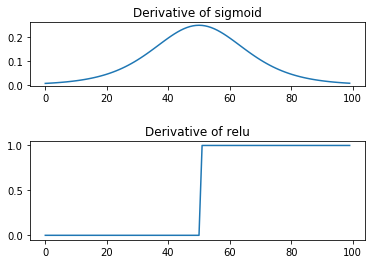

In [756]:
import matplotlib.pyplot as plt
# plot a line, implicitly creating a subplot(111)
#plt.plot([1,2,3])
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
plt.subplot(311)
x = np.arange(-5, 5, 0.1)
y5 = actv_fn(x, fn='sigmoid') 
y7 = actv_fn(y5, fn='sigmoid',derivative = True) 
plt.title('Derivative of sigmoid')
plt.plot(y7)

plt.subplot(212)
x = np.arange(-5, 5, 0.1)
y5 = actv_fn(x, fn='relu') 
y7 = actv_fn(y5, fn='relu',derivative = True) 
plt.title('Derivative of relu')
plt.plot(y7)


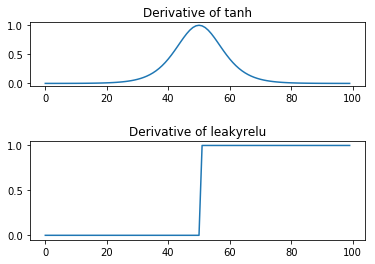

In [757]:
import matplotlib.pyplot as plt
# plot a line, implicitly creating a subplot(111)
plt.plot([1,2,3])
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
plt.subplot(311)
x = np.arange(-5, 5, 0.1)
y5 = actv_fn(x, fn='tanh') 
y7 = actv_fn(y5, fn='tanh',derivative = True) 
plt.title('Derivative of tanh')
plt.plot(y7)

plt.subplot(212)
x = np.arange(-5, 5, 0.1)

y5 = actv_fn(x, fn='leakyrelu') 
y7 = actv_fn(y5, fn='leakyrelu',derivative = True) 
plt.title('Derivative of leakyrelu')
plt.plot(y7)



In [758]:
class NeuralNet:
    def __init__(self, data, labels, weights, biases, function='leakyrelu', 
                 learning_rate=0.005, tolerance=1e-2, max_iter=10000):
        
        self.x = data
        self.count = 0
        self.y = labels
        self.wts = weights
        self.b = biases
        self.fn = function
        self.eta = learning_rate
        self.tol = tolerance
        self.iterations = max_iter
        self.activations = []
        self.ERRORS = []
        self.index=0
        self.check =0
        self.show_params()
        
        
    def show_params(self):
        print ("Activation Function :", self.fn)
        print ("Learning Rate :", self.eta)
        print ("Tolerance :", self.tol)
        print ("Maximum Iterations :", self.iterations)
        print ("Number of layers :", self.wts.ndim)
        print ("----------------------")
        print('Number of hidden layers',self.wts.ndim-1 )
        
    def train(self):
        for i in range(self.iterations):
            print('my interatain', i)
            if len(self.ERRORS)>1:
                err_delta = np.abs(self.ERRORS[-2]-self.ERRORS[-1])
                if err_delta<self.tol:
                    print( "Converged at step", i-1, "with error", self.ERRORS[-1])
                    self.check+=1
                    if self.check>30:
                        break
            self.forwardpropagation()
            self.backpropagation()
            
    def forwardpropagation(self, mode='train', pred_input=None):
        #print "Original weights"
        #pprint(self.wts)
        #print ""
        
        print ("Iteration", len(self.ERRORS))
        print ("===========Starting frontprop pass @ Iteration=================================", self.count)
        if mode == 'train':
            if self.count < self.x.shape[0]:
                fp_input=self.x[self.count]
            else:
                fp_input= self.x[np.random.choice(self.x.shape[0], 1, replace=False), :][0]
                self.index =  np.where(self.x==fp_input)[0][0]
            
        elif mode == 'predict':
            assert(pred_input is not None)
            fp_input = pred_input
        else:
            return "Error has occured while processing input"
        
        # first hidden layer
        layer1_first_unit = actv_fn((np.dot(self.wts[0][1], fp_input)+self.b[0]), fn=self.fn)
        layer1_second_unit = actv_fn((np.dot(self.wts[0][1], fp_input)+self.b[0]), fn=self.fn)
        output_layer_1 = np.array([layer1_first_unit,layer1_first_unit])
        
        # second hidden layer
        layer2_first_unit = actv_fn((np.dot(self.wts[1][0], output_layer_1)+self.b[1]), fn=self.fn)
        layer2_second_unit = actv_fn((np.dot(self.wts[1][1], output_layer_1)+self.b[1]), fn=self.fn)
        output_layer_2 = np.array([layer2_first_unit,layer2_second_unit])
        
        
        # append the results from each layer here for reuse 
        self.activations.append(output_layer_1)
        self.activations.append(output_layer_2)
        
        
        
        
        print('--------------------------------------')
        print('Layer1 output... ', output_layer_1)
        print('Layer2 output... ', output_layer_2)
        print('--------------------------------------')
        final = np.array(self.activations[-1])
        # process output layer
        if self.count < self.x.shape[0]:
            total_error = error(final, self.y[self.count])
        else:
            total_error = error(final, self.y[self.index])
        print('total error',total_error)
        
        if mode == 'predict':
            return final

        self.ERRORS.append(total_error)
        
       
        
    def backpropagation(self):
            print ("Starting backprop pass")
            #print "Prev layers", len(self.activations)
            count = 0
            if self.count < self.x.shape[0]:
                count  = self.count
            else:
                count = self.index
                
            # output derivative, use absolute diference
            #print('self activation',self.activations )
            print(self.count)
            print(self.index)
            print(count)
            derivative_loss = self.y[count].reshape(2,1) - self.activations[-1]
            # compute the derivative of first sigmoid in secind layer
            derivative_first_activation = actv_fn(self.activations[-1], fn=self.fn, derivative=True)
            # compute the derivative in secoond layer for each weight
            derivative_outputlayer_weights= self.activations[-2] # this occurs twice for each unit  
                                                                    # in the 

            print('derivative_outputlayer_weights  >>>', derivative_outputlayer_weights)





            # update outlayer layer weights
            delta_outlayer = -1 * np.multiply(np.multiply(derivative_loss,derivative_first_activation),
                                              derivative_outputlayer_weights)

            print('--------------------------')
            print('delta_outlayer  >>>',delta_outlayer)
            print('--------------------------')
            self.wts[1][0]  = np.add(self.wts[1][0] ,np.multiply(self.eta,delta_outlayer.reshape(2,)))

            self.wts[1][1] = np.add(self.wts[1][1] ,np.multiply(self.eta,delta_outlayer.reshape(2,)))
            print('--------------------------')
            print(' self.wts[1][0] >>>', self.wts[1][0])
            print('--------------------------')
            print('--------------------------')
            print(' self.wts[1][1] >>>', self.wts[1][1])
            print('--------------------------')


            # activation for layer one
            derivative_second_activation = actv_fn(self.activations[-2], fn=self.fn, derivative=True)
            derivative_first_layer_weights = self.x[count]
            print('--------------------------')
            print('derivative_layer1_weights  >>>',self.x[count])
            print('--------------------------')


            # update first layer weights
            delta_first_layer = np.multiply(np.multiply(delta_outlayer,derivative_second_activation),
                                           derivative_outputlayer_weights).reshape(2,)

            print('change and step size',delta_first_layer)
            self.wts[0][0]  = np.add(self.wts[0][0] ,np.multiply(self.eta,delta_first_layer))
            self.wts[0][1]  = np.add(self.wts[0][1] ,np.multiply(self.eta,delta_first_layer))


            print('deltas first layer  >>>',delta_first_layer)
            
            self.count += 1; # increment loop
            
    def predict(self, input_x):
        return self.frontpropagation(mode='predict', pred_input=input_x)
    
    def plot_loss(self):
        plt.figure(figsize=(10,6))
        plt.xlim(0, 1.2*len(self.ERRORS))
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Training Loss over time')
        plt.plot([i for i in range(len(self.ERRORS))], self.ERRORS, 'g-')
        plt.show()
            
        
        
       

In [759]:
X = np.random.normal(2,0.01,(100,2))
#X = np.random.rand(100,2)
Y = np.random.exponential(7,(100,2))
#Y = np.random.normal(1.4,0.5,(100,2))
W = np.array([
                [[0.05, 0.90],[0.08, 0.001]], #layer 0->1
                [[0.50, 0.45],[0.95, 0.55]],  #layer 1->2
            
    
               ])


In [760]:
np.multiply(0.0005,np.array([[1,3]]))


array([[0.0005, 0.0015]])

Activation Function : relu
Learning Rate : 0.5
Tolerance : 1e-05
Maximum Iterations : 1000
Number of layers : 3
----------------------
Number of hidden layers 2
my interatain 0
Iteration 0
===========Starting frontprop pass @ Iteration================================= 0
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [17.96927039  4.03305346]
total error 303.15711604835536
Starting backprop pass
0
0
0
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [1.99010259 2.01181418]
-----------------

derivative_layer1_weights  >>> [2.00202479 1.98844873]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 64
Iteration 64
===========Starting frontprop pass @ Iteration================================= 64
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [1.44540275 3.78315854]
total error 8.950255245728556
Starting backprop pass
64
0
64
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [1.99132946 1.98545473]
--------------------------
ch

 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [1.99910878 2.00971391]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 124
Iteration 124
===========Starting frontprop pass @ Iteration================================= 124
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [0.33452495 0.09881935]
total error 0.8327427805425103
Starting backprop pass
124
18
18
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[0.]
 [0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
-------

--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [3.86622946 2.72341875]
total error 12.596710978703145
Starting backprop pass
186
23
23
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [2.01131058 2.0131928 ]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 187
Iteration 187
===========Starting frontprop pass @ Iteration================================= 187
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 o

--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [ 4.98736444 32.01842649]
total error 988.5118470934444
Starting backprop pass
238
84
84
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [1.98421526 2.02068007]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 239
Iteration 239
===========Starting frontprop pass @ Iteration================================= 239
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 

--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [19.1160933  0.1704288]
total error 334.07375348841725
Starting backprop pass
295
61
61
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [ 0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [2.00041506 1.99746629]
--------------------------
change and step size [-0.  0.]
deltas first layer  >>> [-0.  0.]
my interatain 296
Iteration 296
===========Starting frontprop pass @ Iteration================================= 296
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 o

Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [19.1160933  0.1704288]
total error 334.07375348841725
Starting backprop pass
352
61
61
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [ 0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [2.00041506 1.99746629]
--------------------------
change and step size [-0.  0.]
deltas first layer  >>> [-0.  0.]
my interatain 353
Iteration 353
===========Starting frontprop pass @ Iteration================================= 353
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
-------------------------------

--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [3.80286716 0.19308232]
total error 9.145976593727529
Starting backprop pass
405
93
93
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [ 0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [2.00097363 1.99352338]
--------------------------
change and step size [-0.  0.]
deltas first layer  >>> [-0.  0.]
my interatain 406
Iteration 406
===========Starting frontprop pass @ Iteration================================= 406
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 ou

===========Starting frontprop pass @ Iteration================================= 445
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [ 5.49493397 11.13037252]
total error 127.22902766471087
Starting backprop pass
445
74
74
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [1.994882   2.00811938]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 446
Iteration 446
===========Starting frontprop pass @ Iteration==============================

--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [4.21726153 7.17209161]
total error 51.2862317003015
Starting backprop pass
503
80
80
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [2.02226101 2.00471783]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 504
Iteration 504
===========Starting frontprop pass @ Iteration================================= 504
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 out

Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [3.80286716 0.19308232]
total error 9.145976593727529
Starting backprop pass
561
93
93
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [ 0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [2.00097363 1.99352338]
--------------------------
change and step size [-0.  0.]
deltas first layer  >>> [-0.  0.]
my interatain 562
Iteration 562
===========Starting frontprop pass @ Iteration================================= 562
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
-

===========Starting frontprop pass @ Iteration================================= 612
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [0.99147557 2.79339019]
total error 3.792250951773153
Starting backprop pass
612
91
91
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [2.01361579 2.00174852]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 613
Iteration 613
===========Starting frontprop pass @ Iteration=================================

change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 657
Iteration 657
===========Starting frontprop pass @ Iteration================================= 657
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [ 1.25074635 17.10792422]
total error 264.4444865155774
Starting backprop pass
657
21
21
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [2.00042014 1.99953069]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatai

derivative_layer1_weights  >>> [2.00240902 1.99873741]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 703
Iteration 703
===========Starting frontprop pass @ Iteration================================= 703
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [ 3.95367753 10.02178343]
total error 93.72774287250522
Starting backprop pass
703
31
31
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [1.99848165 1.99440366]
----------------------

--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [4.3015673  2.03091978]
total error 13.29782039657543
Starting backprop pass
748
97
97
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [1.99413369 2.00384552]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 749
Iteration 749
===========Starting frontprop pass @ Iteration================================= 749
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 ou

--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [16.1769478   4.11404451]
total error 245.52890364438767
Starting backprop pass
789
62
62
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [1.99768688 1.98371263]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 790
Iteration 790
===========Starting frontprop pass @ Iteration================================= 790
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2

 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [5.54939109 3.95794713]
total error 31.72664229869086
Starting backprop pass
829
79
79
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [1.99012294 1.99169391]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 830
Iteration 830
===========Starting frontprop pass @ Iteration================================= 830
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.

derivative_layer1_weights  >>> [1.99935832 2.00720209]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 888
Iteration 888
===========Starting frontprop pass @ Iteration================================= 888
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [0.82953786 2.13985536]
total error 1.661388448091529
Starting backprop pass
888
9
9
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[ 0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [1.99603546 1.98707533]
--------------------------

===========Starting frontprop pass @ Iteration================================= 951
--------------------------------------
Layer1 output...  [[0.]
 [0.]]
Layer2 output...  [[0.85108693]
 [0.85108693]]
--------------------------------------
y and yhat are here: [[0.85108693]
 [0.85108693]] [1.0183981  6.37747327]
total error 30.568939060145336
Starting backprop pass
951
46
46
derivative_outputlayer_weights  >>> [[0.]
 [0.]]
--------------------------
delta_outlayer  >>> [[-0.]
 [-0.]]
--------------------------
--------------------------
 self.wts[1][0] >>> [21.88032686 19.18879172]
--------------------------
--------------------------
 self.wts[1][1] >>> [22.33032686 19.28879172]
--------------------------
--------------------------
derivative_layer1_weights  >>> [2.00971664 1.99789   ]
--------------------------
change and step size [-0. -0.]
deltas first layer  >>> [-0. -0.]
my interatain 952
Iteration 952
===========Starting frontprop pass @ Iteration================================

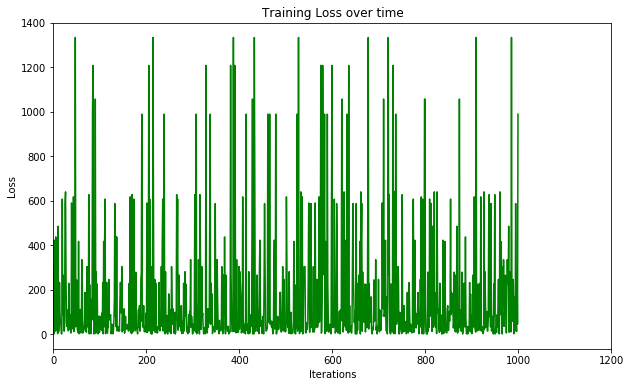

In [762]:
B = np.random.rand(2,1)

NN = NeuralNet(X, Y, W, B, 'relu', 0.5, 1e-05, 1000)
NN.train()
NN.plot_loss()

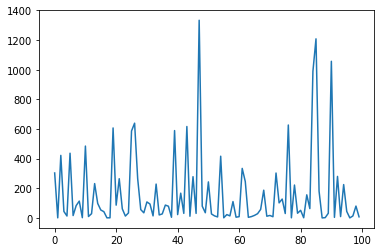

In [763]:
plt.plot(NN.ERRORS[:100])

In [ ]:
y and yhat are here: [[0.32649951]
 [0.18121102]] [6.56382764 3.65988091]
total error 51.42731641334052

In [720]:
np.subtract(np.array([[0.32649951]
 ,[0.18121102]]), np.array([[6.56382764 ]
 ,[3.65988091]]) )

array([[-6.23732813],
       [-3.47866989]])